# The perceptron

![The perceptron](./perceptron.png)

## Import libraries

- `random` is used to generate random numbers to pick random rows to train the perceptron
- `matplotlib` is used for plotting

In [36]:
import random
import matplotlib.pyplot as plot

## Define variables

- `dataset`, the data of the OR function (false=-1, true=+1)
- `learning_rate`, e.g. the total change made while learning. The usage of it is described [here](https://en.wikipedia.org/wiki/Delta_rule)
- `weights`, the importance of specified input where `b` is the bias, the constant that is injected into the sum
- `epochs`, the maximum number of training iterations

In [37]:
dataset = [ 
    {'x1': -1, 'x2': -1, 'output': -1 },
    {'x1': -1, 'x2': +1, 'output': +1 },
    {'x1': +1, 'x2': -1, 'output': +1 },
    {'x1': +1, 'x2': +1, 'output': +1 },
]
learning_rate = 0.1
weights = { 'b': -2, 'w1': 0, 'w2': -1 }
epochs = 100

## Define the function that computes the output of the perceptron


In [38]:
def output(row, weights):
    return weights['b'] + row['x1'] * weights['w1'] + row['x2'] * weights['w2']

## Define the function to plot the weights and the dataset

In [39]:
def figure(iteration, old_weights, new_weights, previous_row):
    # start a new figure
    plot.figure(iteration)
    plot.axis([-4, 4, -4, 4])
    plot.title(f"epoch={iteration + 1:03d} b={new_weights['b']:+.1f} w1={new_weights['w1']:+.1f} w2={new_weights['w2']:+.1f}")

    # plot the new weights
    new_xs = [-4, +4]
    new_ys = [-(new_weights['w1'] * x + new_weights['b']) / new_weights['w2'] for x in new_xs]
    plot.plot(new_xs, new_ys, color='green')

    # plot the old weights
    old_xs = [-4, +4]
    old_ys = [-(old_weights['w1'] * x + old_weights['b']) / old_weights['w2'] for x in old_xs]
    plot.plot(old_xs, old_ys, color='grey', alpha=0.5)
    color_above, color_below = ('red', 'blue') if output({'x1': 0, 'x2': 100}, old_weights) > 0 else ('blue', 'red')
    plot.fill_between(old_xs, old_ys, 4, color=color_above, alpha=0.05)
    plot.fill_between(old_xs, old_ys, -4, color=color_below, alpha=0.05)

    # plot the dataset
    for row in dataset:
        plot.plot(row['x1'], row['x2'], marker='o', color='red' if row["output"] > 0 else 'blue', markersize=10)
    plot.plot(previous_row['x1'], previous_row['x2'], marker='o', color='red' if previous_row["output"] > 0 else 'blue', markersize=20)
    plot.tight_layout()

## Train the perceptron

epoch=000 b=-2.0 w1=+0.0 w2=-1.0 Wrong=3 x1=+1 x2=+1 output=+1 actual=-3.00 error=+4.00 Ok=False
epoch=001 b=-1.6 w1=+0.4 w2=-0.6 Wrong=3 x1=+1 x2=-1 output=+1 actual=-0.60 error=+1.60 Ok=False
epoch=002 b=-1.4 w1=+0.6 w2=-0.8 Wrong=3 x1=-1 x2=-1 output=-1 actual=-1.24 error=+0.24 Ok=True
epoch=003 b=-1.4 w1=+0.6 w2=-0.8 Wrong=3 x1=+1 x2=+1 output=+1 actual=-1.64 error=+2.64 Ok=False
epoch=004 b=-1.2 w1=+0.8 w2=-0.5 Wrong=2 x1=+1 x2=+1 output=+1 actual=-0.85 error=+1.85 Ok=False
epoch=005 b=-1.0 w1=+1.0 w2=-0.3 Wrong=2 x1=-1 x2=-1 output=-1 actual=-1.69 error=+0.69 Ok=True
epoch=006 b=-1.0 w1=+1.0 w2=-0.3 Wrong=2 x1=+1 x2=+1 output=+1 actual=-0.29 error=+1.29 Ok=False
epoch=007 b=-0.9 w1=+1.1 w2=-0.2 Wrong=1 x1=-1 x2=-1 output=-1 actual=-1.82 error=+0.82 Ok=True
epoch=008 b=-0.9 w1=+1.1 w2=-0.2 Wrong=1 x1=+1 x2=+1 output=+1 actual=+0.09 error=+0.91 Ok=True
epoch=009 b=-0.9 w1=+1.1 w2=-0.2 Wrong=1 x1=-1 x2=-1 output=-1 actual=-1.82 error=+0.82 Ok=True
epoch=010 b=-0.9 w1=+1.1 w2=-0.2 Wr

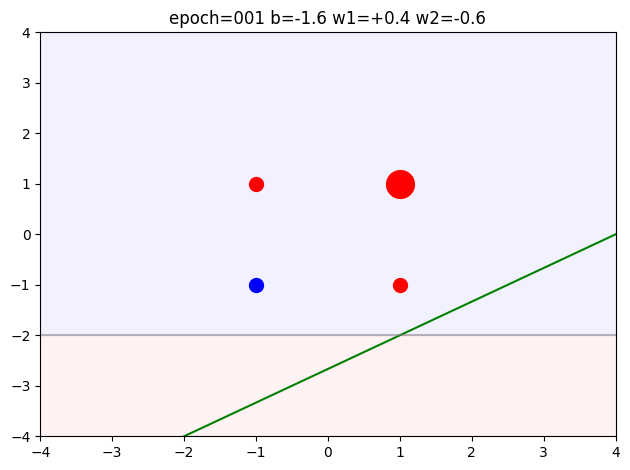

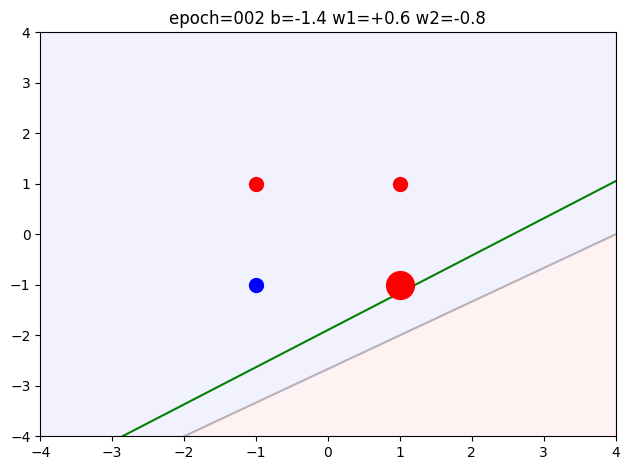

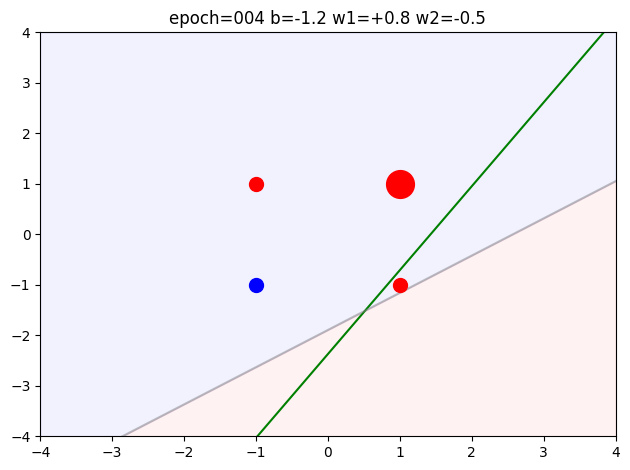

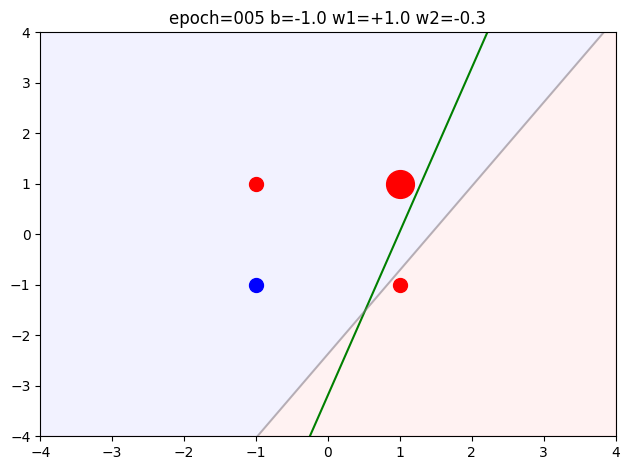

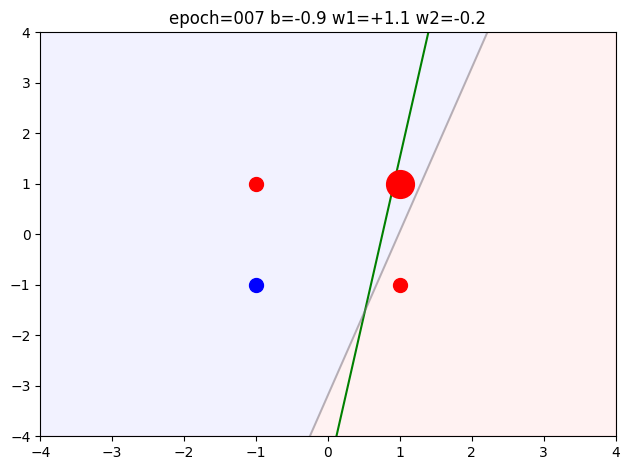

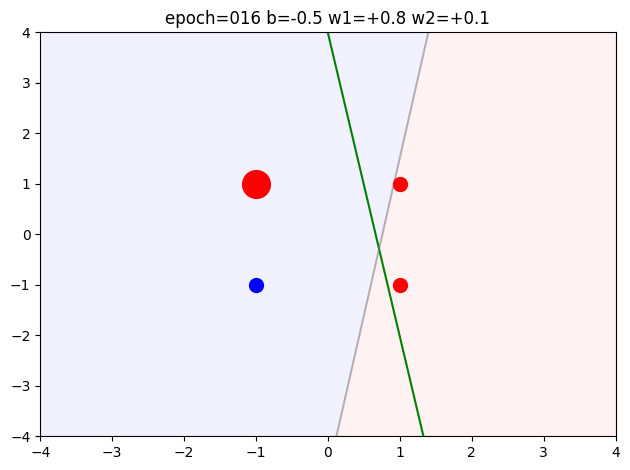

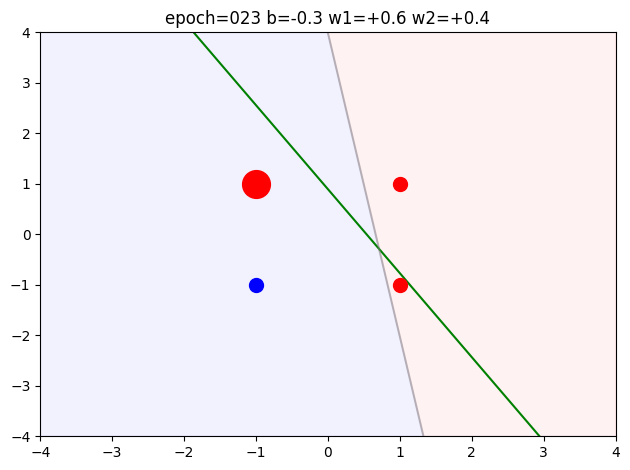

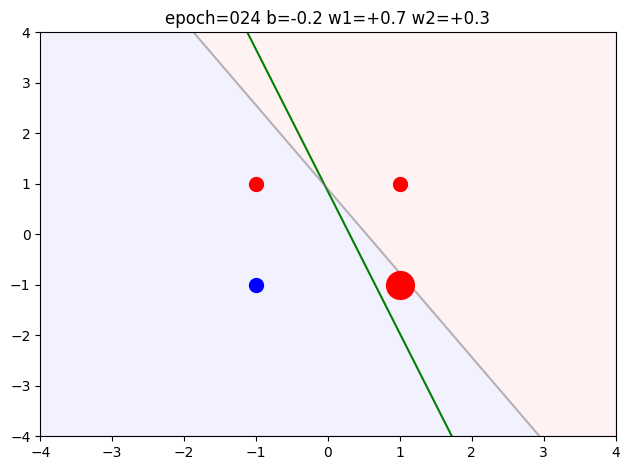

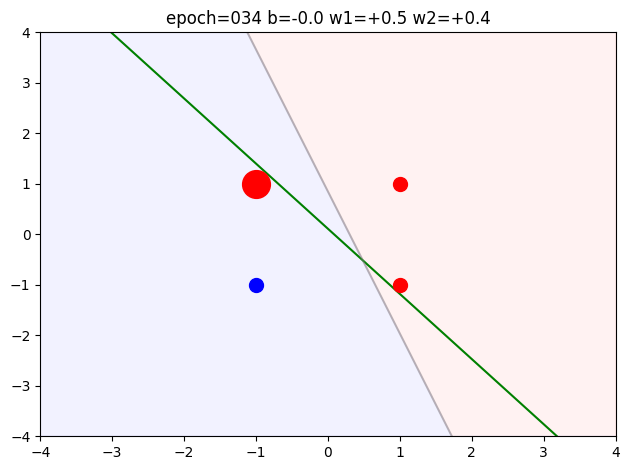

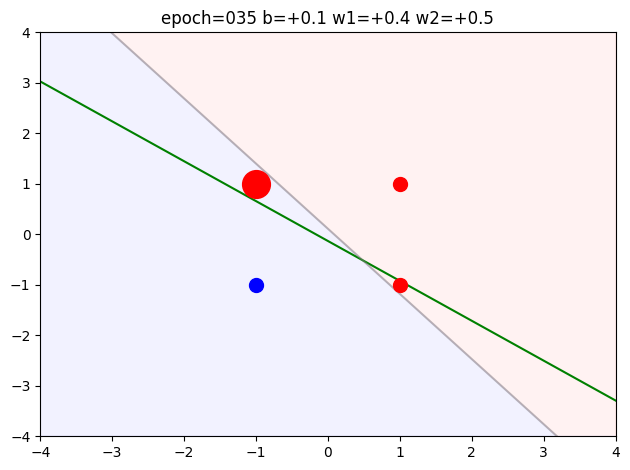

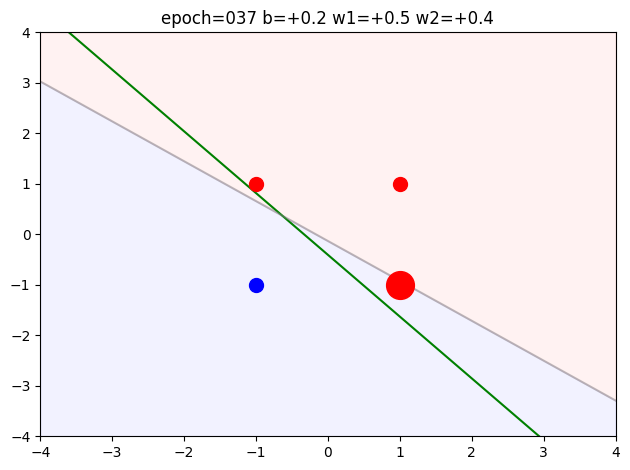

In [40]:
for epoch in range(epochs):
    print(f"epoch={epoch:03d}", end=" ")
    print(f"b={weights['b']:+.1f} w1={weights['w1']:+.1f} w2={weights['w2']:+.1f}", end=" ")

    # compute the number of wrong outputs
    wrong = sum([row["output"] * output(row, weights) < 0 for row in dataset])
    print(f"Wrong={wrong}", end=" ")
    if wrong == 0:
        break

    # pick a random row
    row = random.choice(dataset)
    actual = output(row, weights)
    error = row["output"] - actual
    ok = row["output"] * actual > 0
    print(f"x1={row['x1']:+1d} x2={row['x2']:+1d} output={row['output']:+1d} actual={actual:+.2f} error={error:+.2f} Ok={ok}")
    
    # update the weights
    if not ok:
        previous_weights = dict(weights)
        weights['b'] += learning_rate * error
        weights['w1'] += learning_rate * error * row['x1']
        weights['w2'] += learning_rate * error * row['x2']
        figure(epoch, previous_weights, weights, row)
